# PSYLIQ PYTHON INTERNSHIP
Titanic classification

# NAME: ROHAN KOMKAR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report,
    precision_score,
    recall_score
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"E:\dataset/titanic.xls")

In [3]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
data.shape

(1309, 14)

In [5]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [6]:
data=data.drop(["cabin","body","home.dest","name","ticket","boat"], axis=1)

In [7]:
data

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C
1305,3,0,female,NaN,1,0,14.4542,C
1306,3,0,male,26.5000,0,0,7.2250,C
1307,3,0,male,27.0000,0,0,7.2250,C


In [8]:
suv=data["survived"]
data=data.drop(["survived"],axis =1)

In [9]:
data=pd.concat([data,suv],axis=1)

In [10]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,1,female,2.0000,1,2,151.5500,S,0
3,1,male,30.0000,1,2,151.5500,S,0
4,1,female,25.0000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C,0
1305,3,female,NaN,1,0,14.4542,C,0
1306,3,male,26.5000,0,0,7.2250,C,0
1307,3,male,27.0000,0,0,7.2250,C,0


In [11]:
data.age.value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [12]:
data.age=data.age.fillna(22.5000)

In [13]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    2
survived    0
dtype: int64

In [14]:
data.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [15]:
data.embarked=data.embarked.fillna("Q")

In [16]:
data.embarked.value_counts()

S    914
C    270
Q    125
Name: embarked, dtype: int64

In [17]:
data.age.value_counts()

22.5000    264
24.0000     47
22.0000     43
21.0000     41
30.0000     40
          ... 
66.0000      1
0.6667       1
76.0000      1
67.0000      1
26.5000      1
Name: age, Length: 98, dtype: int64

In [18]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
survived    0
dtype: int64

In [19]:
data.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64

In [20]:
data.fare=data.fare.fillna(7.8750)

In [21]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

# Data visualisation

<AxesSubplot:>

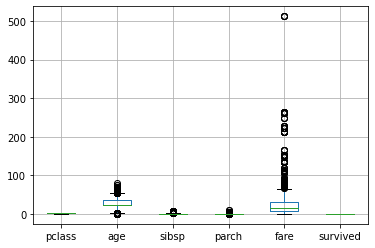

In [22]:
data.boxplot()

In [23]:
data.age.value_counts()

22.5000    264
24.0000     47
22.0000     43
21.0000     41
30.0000     40
          ... 
66.0000      1
0.6667       1
76.0000      1
67.0000      1
26.5000      1
Name: age, Length: 98, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

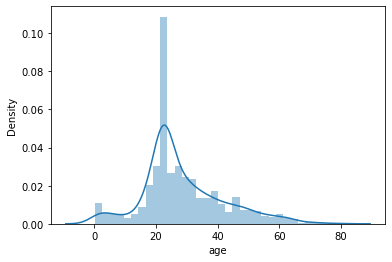

In [24]:
sns.distplot(data.age)

In [25]:
data.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.3000      1
9.4750      1
31.6792     1
31.6833     1
14.0000     1
Name: fare, Length: 281, dtype: int64

<AxesSubplot:xlabel='fare', ylabel='Density'>

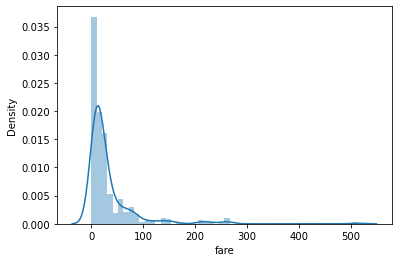

In [26]:
sns.distplot(data.fare)

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

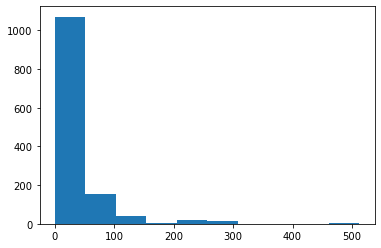

In [27]:
plt.hist(data.fare)

In [28]:
iqr=data.fare.quantile(0.75)-data.fare.quantile(0.25)
iqr

23.379199999999997

In [29]:
ub=data.fare.quantile(0.75)+(iqr*3)
lb=data.fare.quantile(0.25)-(iqr*3)
print(lb,ub)

-62.24179999999999 101.4126


In [30]:
data.loc[data["fare"]>101.4126,"fare"]=101.4126

<AxesSubplot:ylabel='fare'>

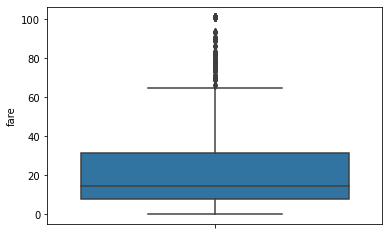

In [31]:
sns.boxplot(data=data, y="fare")

In [32]:
data.sibsp.value_counts()                     #sibsq is discrete column therefore , we dont need to treat outlier

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

<AxesSubplot:ylabel='age'>

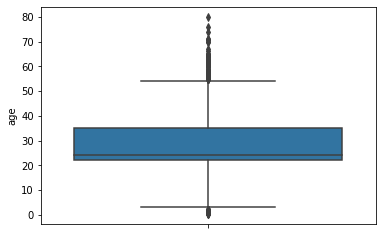

In [33]:
sns.boxplot(data=data,y="age")

In [34]:
data.age.describe()

count    1309.000000
mean       28.398141
std        13.218563
min         0.166700
25%        22.000000
50%        24.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [35]:
ub=data["age"].mean()+3*data["age"].std()
lb=data["age"].mean()-3*data["age"].std()
print(lb,ub)

-11.257548063372582 68.05383026352537


In [36]:
data.loc[data["age"]>73.1217,"age"]=73.1217

<AxesSubplot:ylabel='age'>

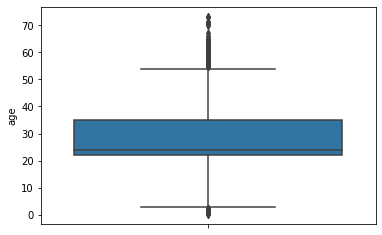

In [37]:
sns.boxplot(data=data,y="age")

<AxesSubplot:xlabel='parch', ylabel='Density'>

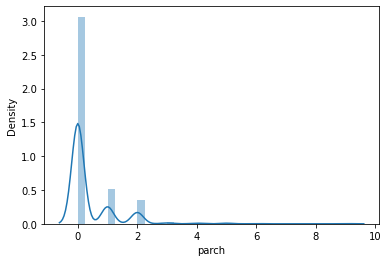

In [38]:
sns.distplot(data.parch)

In [39]:
iqr=data.parch.quantile(0.75)-data.parch.quantile(0.25)
iqr

0.0

<AxesSubplot:ylabel='parch'>

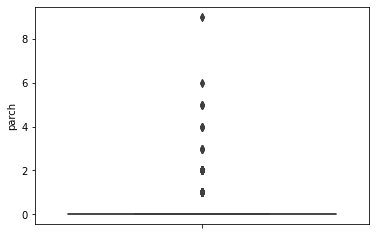

In [40]:
sns.boxplot(data=data,y="parch")

In [41]:
data.skew()

pclass     -0.598647
age         0.708271
sibsp       3.844220
parch       3.669078
fare        1.564028
survived    0.486404
dtype: float64

In [42]:
data.loc[data["fare"]==0]

,pclass,sex,age,sibsp,parch,fare,embarked,survived
7,1,male,39.0,0,0,0.0,S,0
70,1,male,22.5,0,0,0.0,S,0
125,1,male,22.5,0,0,0.0,S,0
150,1,male,40.0,0,0,0.0,S,0
170,1,male,49.0,0,0,0.0,S,1
223,1,male,22.5,0,0,0.0,S,0
234,1,male,38.0,0,0,0.0,S,0
363,2,male,22.5,0,0,0.0,S,0
384,2,male,22.5,0,0,0.0,S,0
410,2,male,22.5,0,0,0.0,S,0


In [43]:
v=np.sqrt(data.fare)

In [44]:
v.skew()

0.9889060307770994

In [45]:
data.sibsp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [46]:
data.shape

(1309, 8)

# Heatmap to find out Correlation 

In [47]:
x=data.corr()

In [48]:
x

,pclass,age,sibsp,parch,fare,survived
pclass,1.000000,-0.403732,0.060832,0.018322,-0.709618,-0.312469
age,-0.403732,1.000000,-0.184459,-0.109141,0.230600,-0.025543
sibsp,0.060832,-0.184459,1.000000,0.373587,0.262874,-0.027825
parch,0.018322,-0.109141,0.373587,1.000000,0.267484,0.082660
fare,-0.709618,0.230600,0.262874,0.267484,1.000000,0.296151
survived,-0.312469,-0.025543,-0.027825,0.082660,0.296151,1.000000


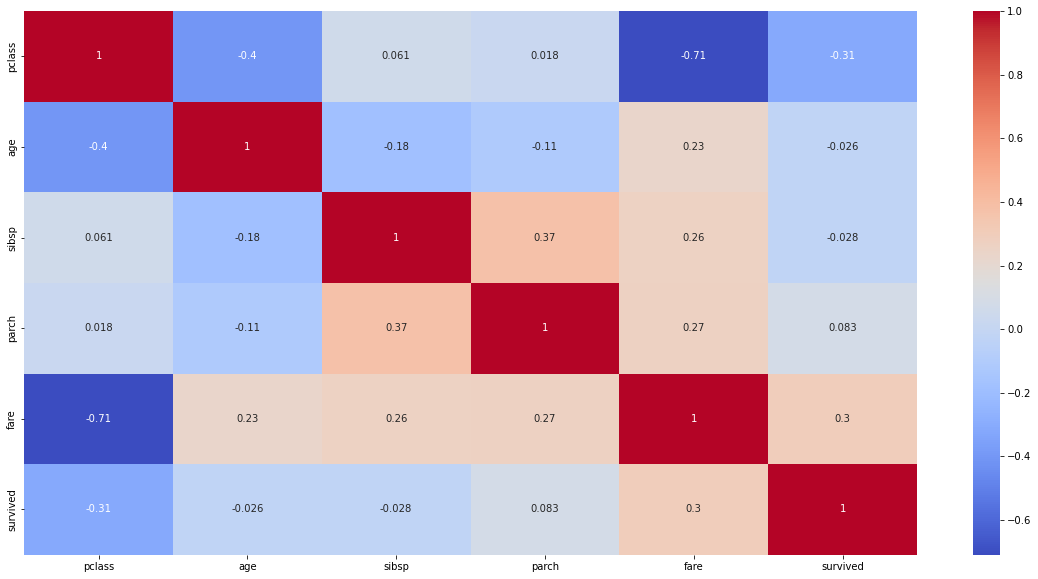

In [49]:
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)

# SURVIVED DISTRIBUTION

<AxesSubplot:xlabel='survived', ylabel='count'>

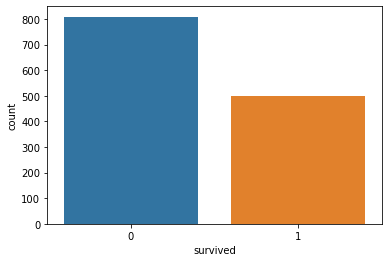

In [50]:
sns.countplot(data.survived)

# SURVIVED BY AGE

Text(0.5, 1.0, 'survivence presence with age')

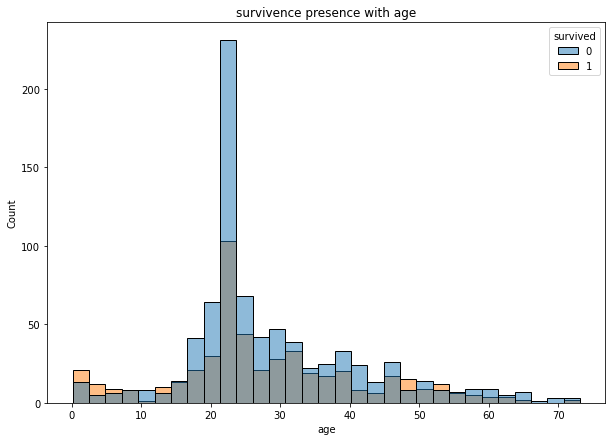

In [51]:

plt.figure(figsize=(10,7))
sns.histplot(data = data, x = 'age', hue='survived')
plt.title("survivence presence with age")

# GENDER V/S SURVIVED 

Text(0.5, 1.0, 'passenger survived v/s gender')

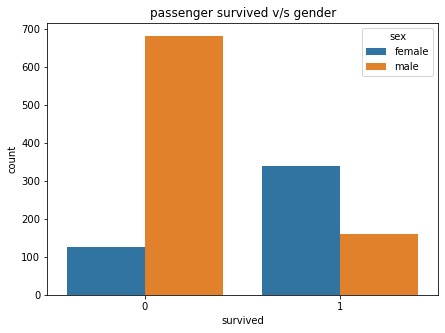

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(data = data, x = 'survived', hue = 'sex')
plt.title("passenger survived v/s gender")

# SURVIVED ACCORDING TO NO.OF SIBLINGS COUNT

Text(0.5, 1.0, 'passenger survived v/s sibsp')

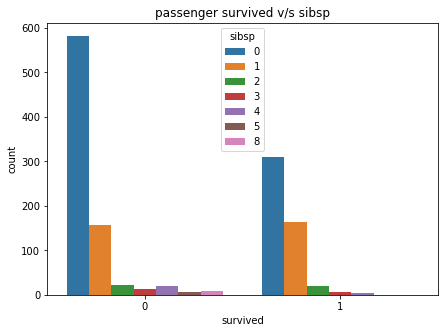

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(data = data, x = 'survived', hue = 'sibsp')
plt.title("passenger survived v/s sibsp")

# SURVIVED BY TICKET CLASS

Text(0.5, 1.0, 'passenger survived v/s pclass')

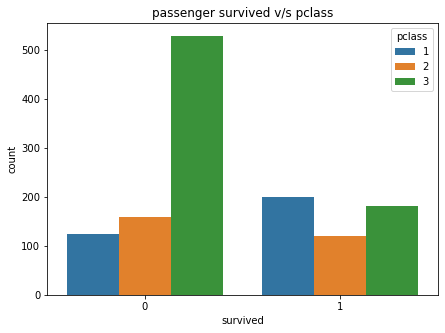

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(data = data, x = 'survived', hue = 'pclass')
plt.title("passenger survived v/s pclass")

# SURVIVED NY PASSENGER FARE

<AxesSubplot:xlabel='fare', ylabel='Count'>

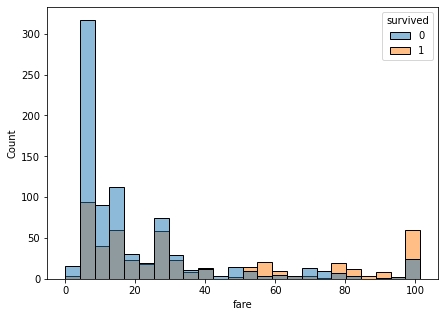

In [55]:
plt.figure(figsize=(7,5))
sns.histplot(data=data, x='fare', hue='survived')


# label encoding

In [56]:
data.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.sex=le.fit_transform(data.sex)
data.embarked=le.fit_transform(data.embarked)


In [58]:
data.dtypes

pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
survived      int64
dtype: object

In [59]:
data.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0


# machine learning

In [60]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0,0
1305,3,0,22.5000,1,0,14.4542,0,0
1306,3,1,26.5000,0,0,7.2250,0,0
1307,3,1,27.0000,0,0,7.2250,0,0


In [61]:
x=data.drop(["survived"],axis=1)
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,101.4126,2
1,1,1,0.9167,1,2,101.4126,2
2,1,0,2.0000,1,2,101.4126,2
3,1,1,30.0000,1,2,101.4126,2
4,1,0,25.0000,1,2,101.4126,2
...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,0
1305,3,0,22.5000,1,0,14.4542,0
1306,3,1,26.5000,0,0,7.2250,0
1307,3,1,27.0000,0,0,7.2250,0


In [62]:
y=suv
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [65]:
#x_train

In [66]:
#x_test

In [67]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1047, 7), (262, 7), (1047,), (262,))

# logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression 

In [69]:
lg=LogisticRegression()

In [70]:
lg.fit(x_train,y_train)

LogisticRegression()

In [71]:
lg_p=lg.predict(x_test)
lg_p

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1],
      dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
l_m=confusion_matrix(lg_p,y_test)
l_m

array([[136,  31],
       [ 31,  64]], dtype=int64)

In [74]:
lg_acc=l_m.diagonal().sum()/l_m.sum()*100
lg_acc

76.33587786259542

In [75]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.6736842105263158

In [76]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.6736842105263158

In [77]:
from sklearn.metrics import classification_report
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.67      0.67      0.67        95

    accuracy                           0.76       262
   macro avg       0.74      0.74      0.74       262
weighted avg       0.76      0.76      0.76       262



# Decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [79]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dt_p=dt.predict(x_test)

In [81]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[133,  28],
       [ 34,  67]], dtype=int64)

In [82]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

76.33587786259542

# feature selection

In [83]:
dt.feature_importances_

array([0.08592361, 0.32542656, 0.22391764, 0.06455722, 0.02928094,
       0.2465911 , 0.02430293])

In [84]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.085924,pclass
1,0.325427,sex
2,0.223918,age
3,0.064557,sibsp
4,0.029281,parch
5,0.246591,fare
6,0.024303,embarked


In [85]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.7052631578947368

In [86]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.6633663366336634

In [87]:
print(classification_report(dt_p,y_test))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       161
           1       0.71      0.66      0.68       101

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262



# Random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
rf_p=rf.predict(x_test)

In [91]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[139,  22],
       [ 28,  73]], dtype=int64)

In [92]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

80.91603053435115

In [93]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.7684210526315789

In [94]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.7227722772277227

In [95]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       161
           1       0.77      0.72      0.74       101

    accuracy                           0.81       262
   macro avg       0.80      0.79      0.80       262
weighted avg       0.81      0.81      0.81       262



# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [97]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [98]:
k_p=knn.predict(x_test)

In [99]:
ck=confusion_matrix(k_p,y_test)
ck

array([[143,  51],
       [ 24,  44]], dtype=int64)

In [100]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

71.37404580152672

In [101]:
k_pr=precision_score(k_p,y_test)
k_pr

0.4631578947368421

In [102]:
k_re=recall_score(k_p,y_test)
k_re

0.6470588235294118

In [103]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       194
           1       0.46      0.65      0.54        68

    accuracy                           0.71       262
   macro avg       0.66      0.69      0.67       262
weighted avg       0.75      0.71      0.73       262



In [104]:
lst=list()

In [105]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

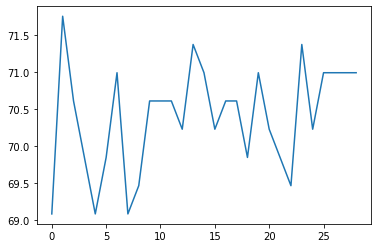

In [106]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [107]:
from sklearn.svm import SVC
svc=SVC()

In [108]:
svc.fit(x_train,y_train)

SVC()

In [109]:
s_p=svc.predict(x_test)
s_p

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [110]:
cs=confusion_matrix(s_p,y_test)
cs

array([[145,  56],
       [ 22,  39]], dtype=int64)

In [111]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

70.22900763358778

In [112]:
s_pr=precision_score(s_p,y_test)
s_pr

0.4105263157894737

In [113]:
s_re=recall_score(s_p,y_test)
s_re

0.639344262295082

In [114]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       201
           1       0.41      0.64      0.50        61

    accuracy                           0.70       262
   macro avg       0.64      0.68      0.64       262
weighted avg       0.76      0.70      0.72       262



# MAKE DATAFRAME FOR COMPARE RESULT

In [115]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","KNN","SVM"]
list2=[lg_acc,dt_ac,rf_acc,kacc,acc_s]
list3=[lg_pr,dt_pr,rf_pr,k_pr,s_pr]
list4=[lg_re,dt_re,rf_re,k_re,s_re]



In [116]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4})
df1

,Model Name,Accuracy,Precision,Recall
0,LOGISTIC REGRESSION,76.335878,0.673684,0.673684
1,DECISION TREE,76.335878,0.705263,0.663366
2,RANDOM FOREST,80.916031,0.768421,0.722772
3,KNN,71.374046,0.463158,0.647059
4,SVM,70.229008,0.410526,0.639344


In [117]:
data.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,0,29.0000,0,0,101.4126,2,1
1,1,1,0.9167,1,2,101.4126,2,1
2,1,0,2.0000,1,2,101.4126,2,0
3,1,1,30.0000,1,2,101.4126,2,0
4,1,0,25.0000,1,2,101.4126,2,0


# classification using test data

In [118]:
test = [[1,0,29,0,0,101.4126,2]]
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)

test = norm.transform(test)

In [119]:
pred = rf.predict(test)

In [120]:
if pred:
    print("passenger survived")
else:
    print("NOT survived" )

passenger survived
